## Loading the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv("flickr_data2.csv", delimiter=",",encoding="UTF-8")
df.head()

C:\Users\colin\AppData\Local\Temp\ipykernel_6396\4217817181.py:1: DtypeWarning: Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("flickr_data2.csv", delimiter=",",encoding="UTF-8")


,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23,20,28.0,2,2010.0,NaN,NaN,NaN
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52,17,28.0,2,2010.0,NaN,NaN,NaN
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33,17,28.0,2,2010.0,NaN,NaN,NaN
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38,12,28.0,2,2010.0,NaN,NaN,NaN


## Understanding the data

In [3]:
df.shape

(420240, 19)

In [4]:
df.dtypes

id                       int64
 user                   object
 lat                   float64
 long                  float64
 tags                   object
 title                  object
 date_taken_minute     float64
 date_taken_hour         int64
 date_taken_day          int64
 date_taken_month        int64
 date_taken_year         int64
 date_upload_minute     object
 date_upload_hour       object
 date_upload_day       float64
 date_upload_month       int64
 date_upload_year      float64
Unnamed: 16            float64
Unnamed: 17            float64
Unnamed: 18            float64
dtype: object

In [5]:
list(df.columns)

['id',
 ' user',
 ' lat',
 ' long',
 ' tags',
 ' title',
 ' date_taken_minute',
 ' date_taken_hour',
 ' date_taken_day',
 ' date_taken_month',
 ' date_taken_year',
 ' date_upload_minute',
 ' date_upload_hour',
 ' date_upload_day',
 ' date_upload_month',
 ' date_upload_year',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [6]:
df.columns = df.columns.str.strip()

In [7]:
list(df.columns)

['id',
 'user',
 'lat',
 'long',
 'tags',
 'title',
 'date_taken_minute',
 'date_taken_hour',
 'date_taken_day',
 'date_taken_month',
 'date_taken_year',
 'date_upload_minute',
 'date_upload_hour',
 'date_upload_day',
 'date_upload_month',
 'date_upload_year',
 'Unnamed: 16',
 'Unnamed: 17',
 'Unnamed: 18']

In [8]:
df["date_upload_minute"] = pd.to_numeric(
    df["date_upload_minute"], errors="coerce"
)


In [9]:

df["date_upload_hour"] = pd.to_numeric(
    df["date_upload_hour"], errors="coerce"
)

In [10]:
atributosNum = df.select_dtypes(include=[np.number]).columns
pd.DataFrame(atributosNum, columns=['Atributos numéricos'])

,Atributos numéricos
0,id
1,lat
2,long
3,date_taken_minute
4,date_taken_hour
5,date_taken_day
6,date_taken_month
7,date_taken_year
8,date_upload_minute
9,date_upload_hour


In [11]:
atributosNum = atributosNum.drop(
    ["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"],
 
)
atributosNum

Index(['id', 'lat', 'long', 'date_taken_minute', 'date_taken_hour',
       'date_taken_day', 'date_taken_month', 'date_taken_year',
       'date_upload_minute', 'date_upload_hour', 'date_upload_day',
       'date_upload_month', 'date_upload_year'],
      dtype='object')

In [12]:
df[atributosNum].describe()

,id,lat,long,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
count,4.202400e+05,420240.000000,420240.000000,420239.000000,420240.000000,420240.000000,420240.000000,420240.000000,420099.000000,420236.000000,420238.000000,420240.000000,420239.000000
mean,2.002697e+10,45.768173,4.839672,30.068559,14.746695,15.456813,7.000493,2013.294256,29.509608,14.559624,16.398738,6.698277,2013.648624
std,1.411384e+10,0.028575,0.031619,39.880117,6.583236,9.637870,4.611831,37.141359,17.529407,6.526078,8.450967,4.672163,37.006109
min,3.066675e+08,45.655200,4.720312,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,7.094503e+09,45.757613,4.826202,14.000000,12.000000,8.000000,4.000000,2012.000000,15.000000,11.000000,9.000000,4.000000,2012.000000
50%,1.548087e+10,45.763152,4.832183,30.000000,15.000000,15.000000,7.000000,2014.000000,30.000000,16.000000,17.000000,7.000000,2014.000000
75%,3.145886e+10,45.773509,4.846558,45.000000,18.000000,23.000000,10.000000,2017.000000,44.000000,20.000000,24.000000,10.000000,2017.000000
max,4.914809e+10,45.854950,5.006709,2019.000000,2013.000000,2013.000000,2011.000000,2238.000000,2018.000000,54.000000,31.000000,2011.000000,2019.000000


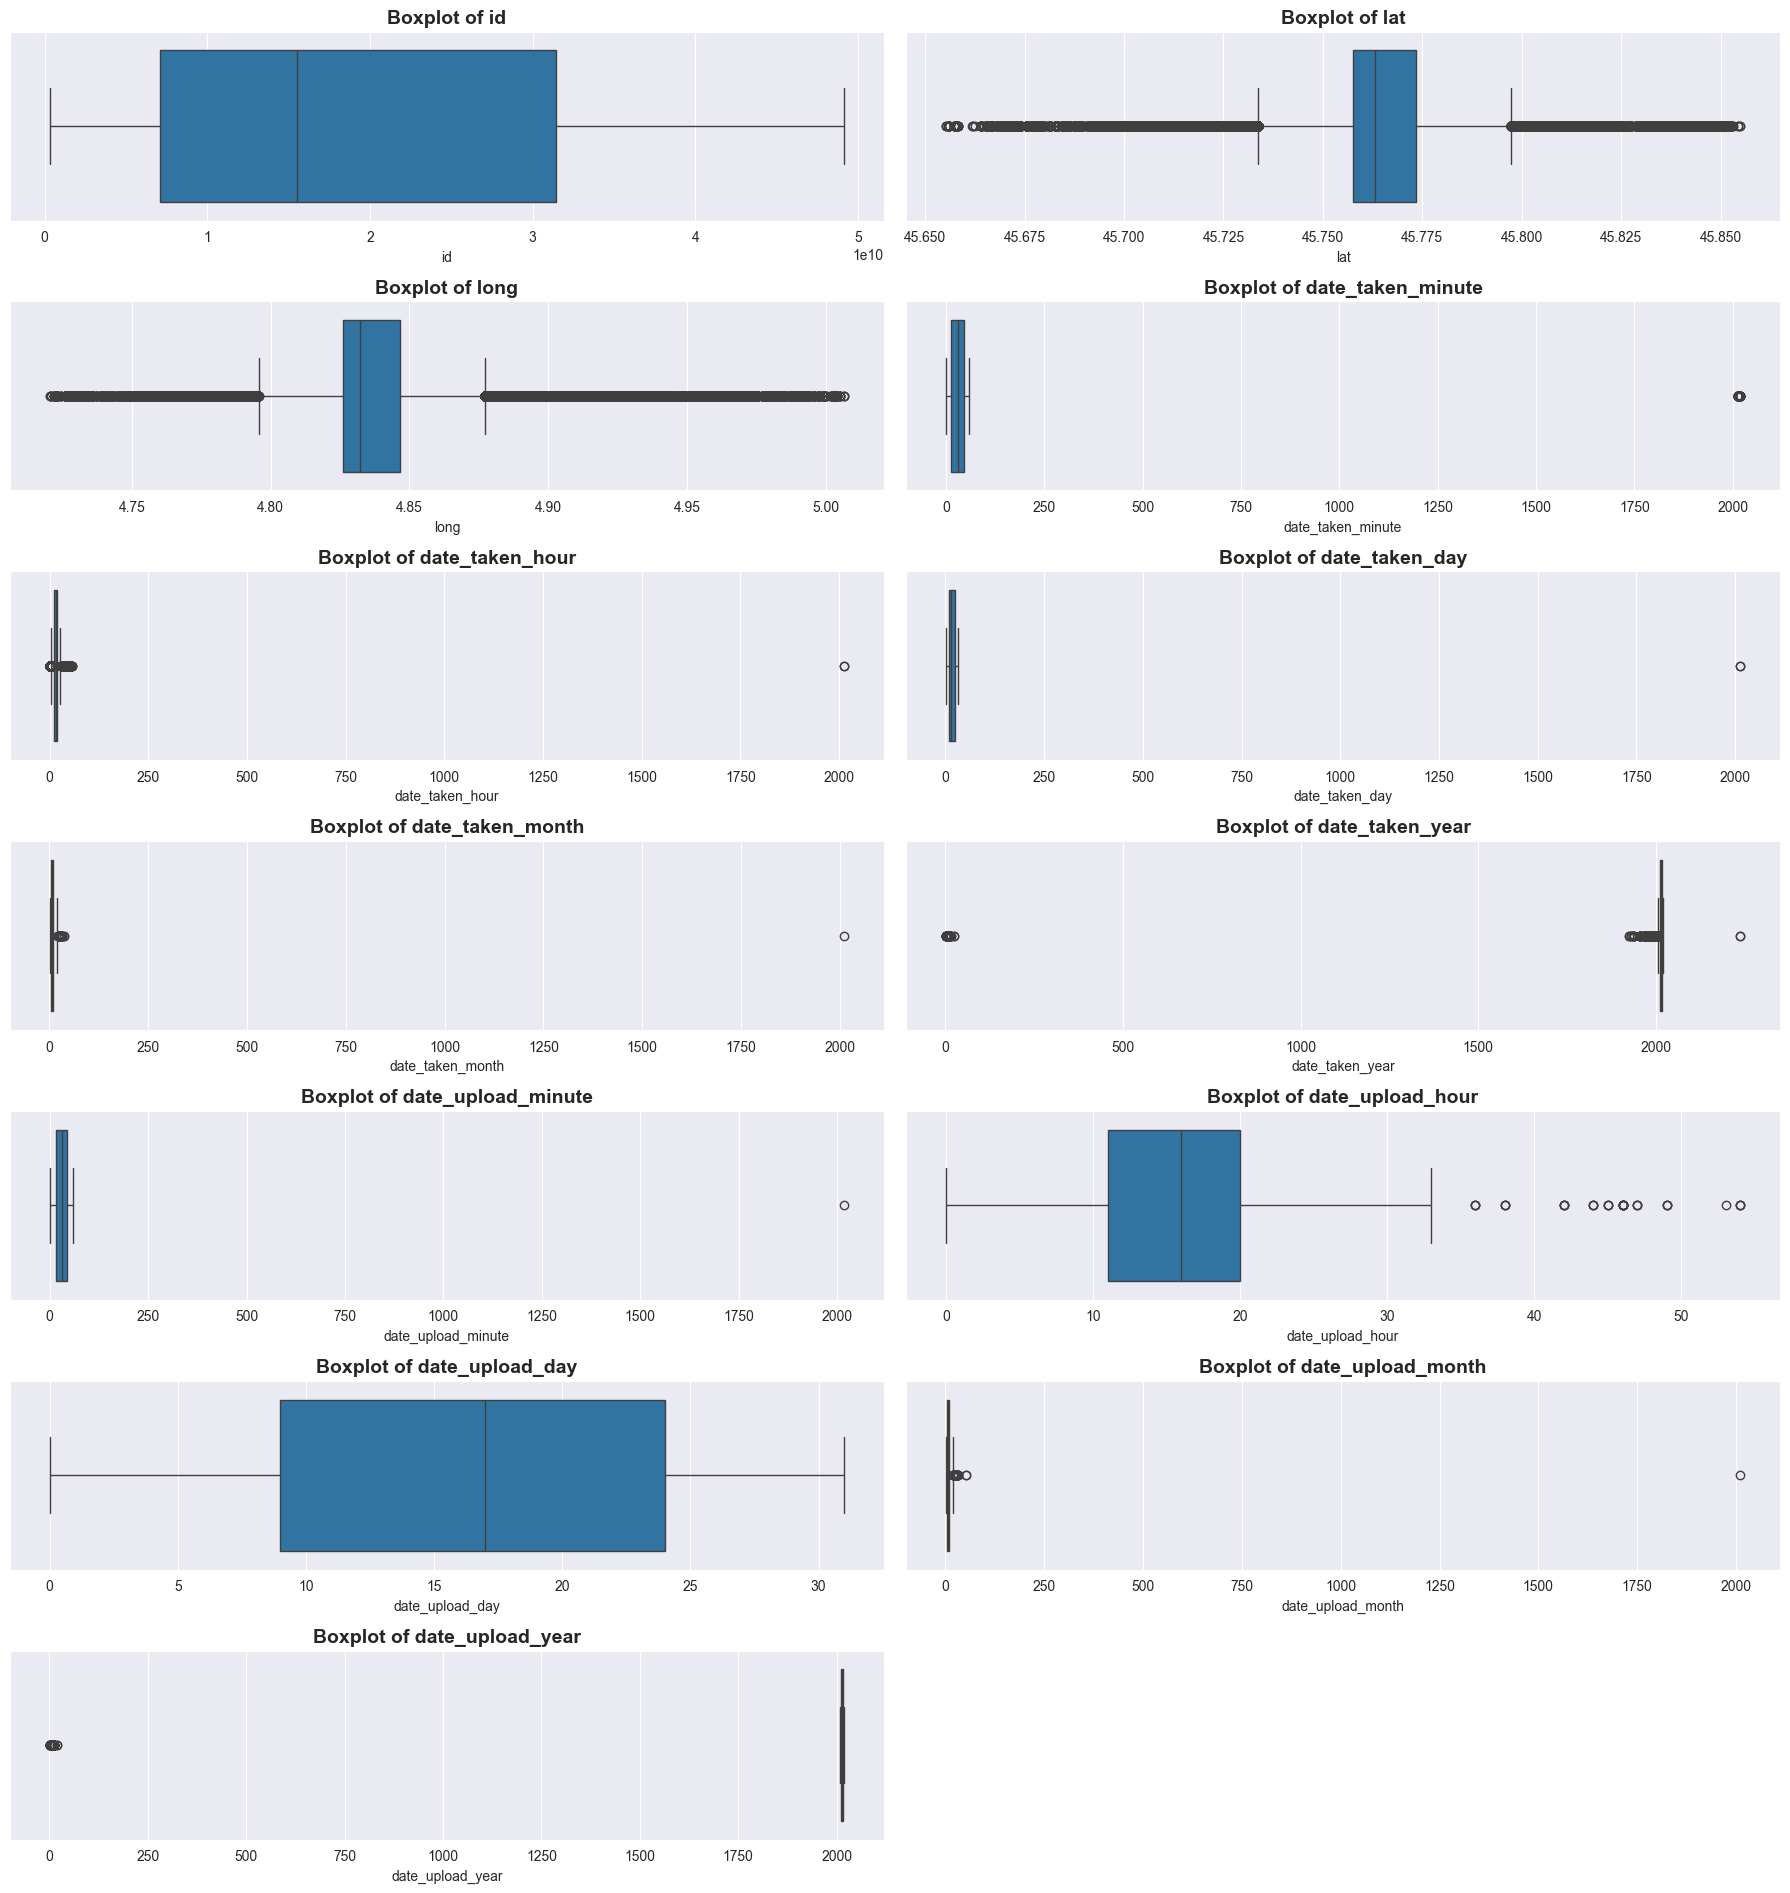

In [13]:

plt.figure(figsize=(18, 24))
for i, col in enumerate(atributosNum, 1):
    plt.subplot(9, 2, i)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

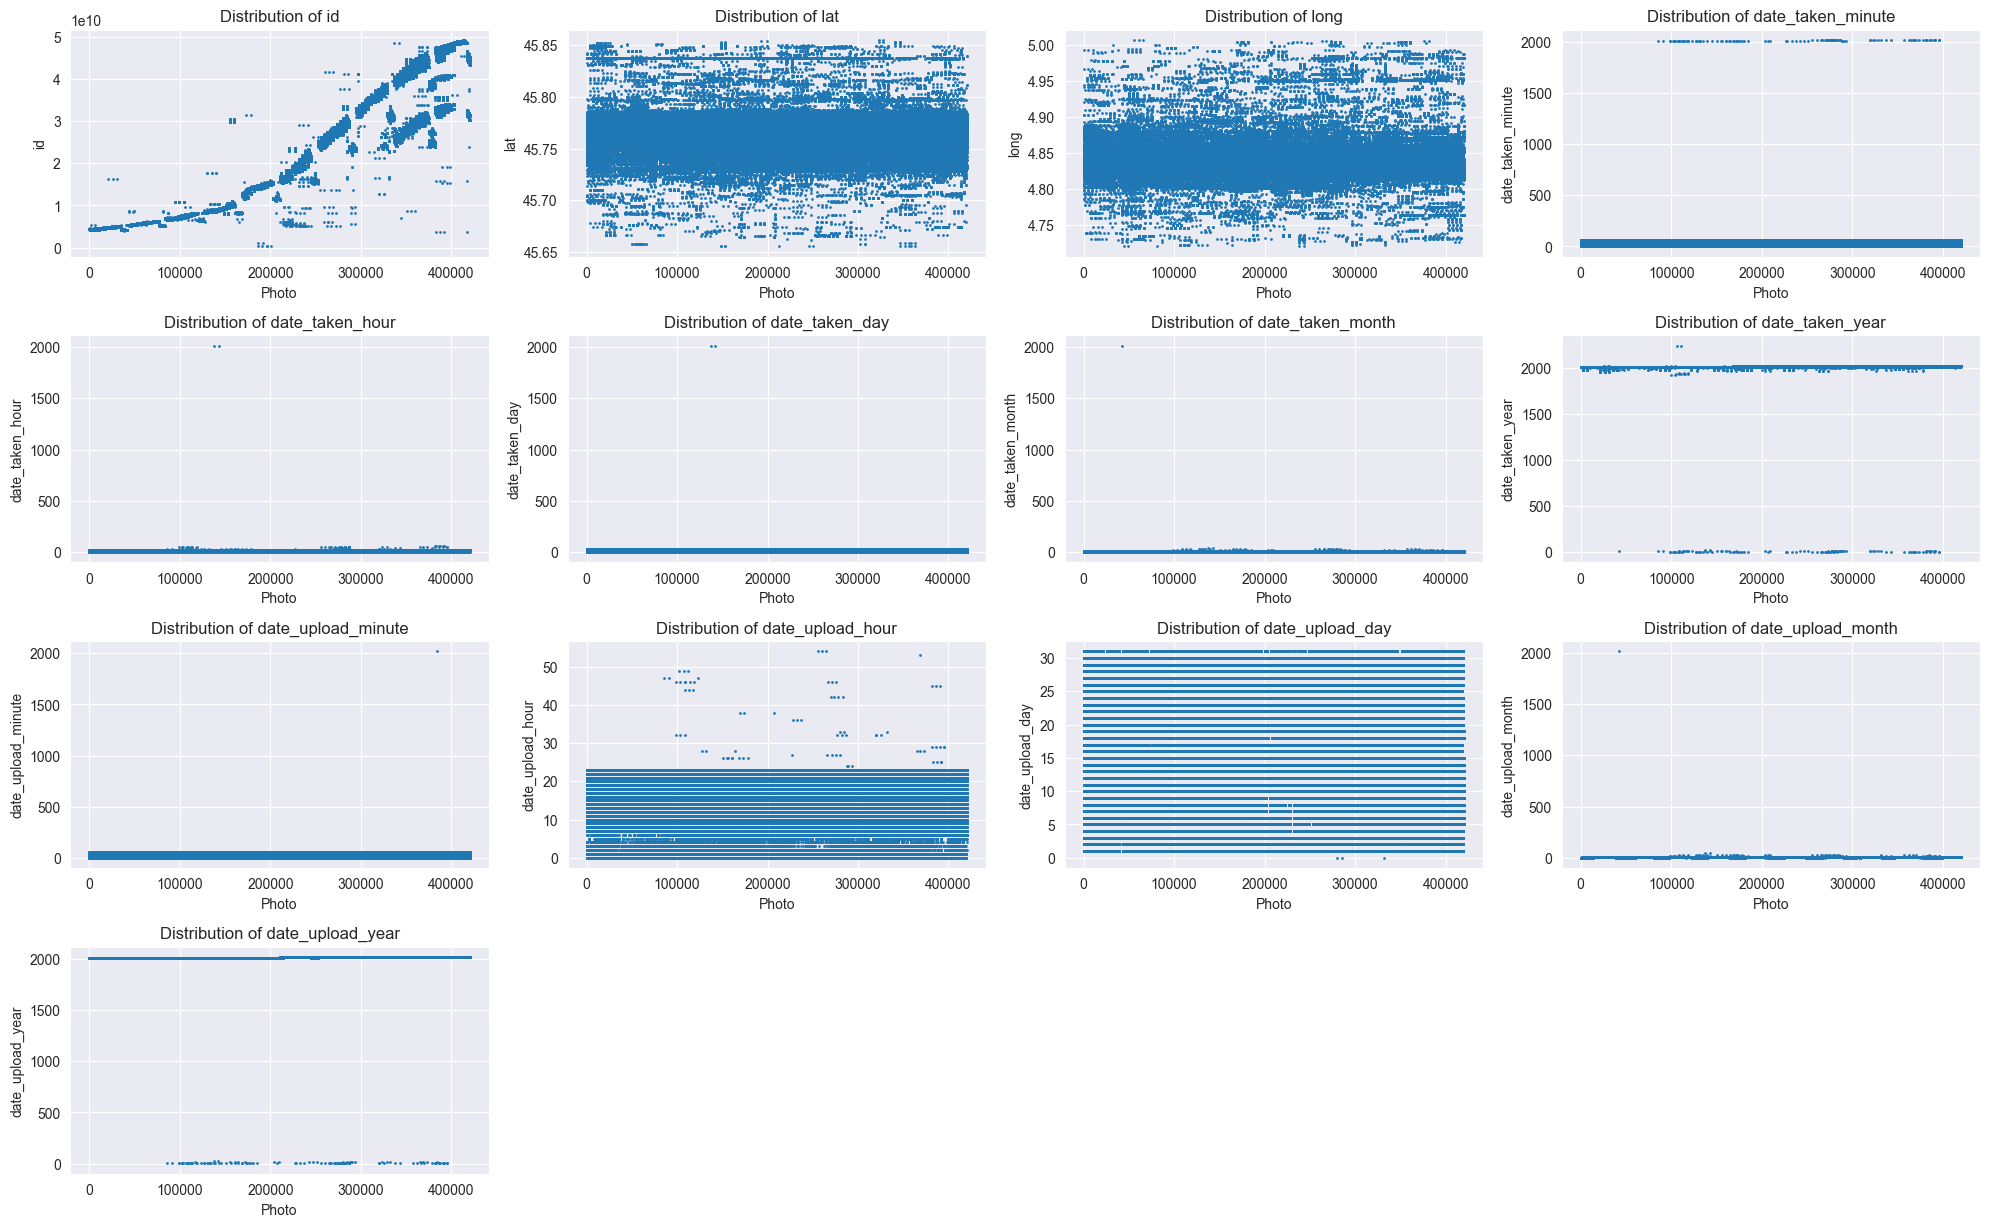

In [14]:

fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 15))
axes = axes.flatten()

# Iterar sobre cada variable y crear un scatter plot
for i, var in enumerate(atributosNum):
    x = df.index  # Índices de los pacientes
    y = df[var]   # Variable actual

    axes[i].scatter(x, y, s=1)
    axes[i].set_xlabel('Photo')
    axes[i].set_ylabel(var)
    axes[i].set_title(f'Distribution of {var}')

# Eliminar cualquier subplot vacío si hay menos variables que subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

In [15]:
porcentajeIncompletitudAtributo =  (100 * df.isnull().sum() / df.shape[0]).sort_values(ascending=False)
pd.DataFrame({
    "Feature": porcentajeIncompletitudAtributo.index,
    "Compleateness (%)": 100 - porcentajeIncompletitudAtributo.values,
    "Incompleateness (%)": porcentajeIncompletitudAtributo.values,
    "# of missing entrances": porcentajeIncompletitudAtributo.values * df.shape[0] / 100
})

,Feature,Compleateness (%),Incompleateness (%),# of missing entrances
0,Unnamed: 17,0.000000,100.000000,420240.0
1,Unnamed: 18,0.000476,99.999524,420238.0
2,Unnamed: 16,0.033790,99.966210,420098.0
3,tags,75.368837,24.631163,103510.0
4,title,90.879259,9.120741,38329.0
5,date_upload_minute,99.966448,0.033552,141.0
6,date_upload_hour,99.999048,0.000952,4.0
7,date_upload_day,99.999524,0.000476,2.0
8,date_upload_year,99.999762,0.000238,1.0
9,date_taken_minute,99.999762,0.000238,1.0


In [16]:
registrosDuplicados = df.duplicated()
totalDuplicados = registrosDuplicados.sum()
totalRegistros = df.shape[0]
porcentajeDuplicados = 100.0 * totalDuplicados / totalRegistros
print(f"There are {totalDuplicados} duplicated entrences ({porcentajeDuplicados:.2f}%)")

There are 252139 duplicated entrences (60.00%)


In [34]:

numeric_minimums = {
    "lat": 44,
    "long": 4,
    "date_taken_minute": 0,
    "date_taken_hour": 0,
    "date_taken_day": 1,
    "date_taken_month": 0, 
    "date_taken_year": 1950,
    "date_upload_minute": 0,
    "date_upload_hour": 0,
    "date_upload_day": 1,
    "date_upload_month": 1,
    "date_upload_year": 1950
}


numeric_maximums = {
   "lat": 48,
    "long": 6,
    "date_taken_minute": 59,
    "date_taken_hour": 59,
    "date_taken_day": 31,
    "date_taken_month": 12, 
    "date_taken_year": 2026,
    "date_upload_minute": 59,
    "date_upload_hour": 24,
    "date_upload_day": 32,
    "date_upload_month": 23,
    "date_upload_year": 2026
}

# Verificar mimin
for col, min_val in numeric_minimums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] < min_val][col]  

    if not out_of_range.empty:
        print(f"\nVals less than {min_val} in {col}:")
        print(out_of_range.describe())

# Verificar maxim
for col, max_val in numeric_maximums.items():
    df[col] = pd.to_numeric(df[col], errors="coerce")  
    out_of_range = df[df[col] > max_val][col]  

    if not out_of_range.empty:
        print(f"\nVals over than {max_val} in {col}:")
        print(out_of_range.describe())



Vals less than 1950 in date_taken_year:
count     154.000000
mean      145.279221
std       497.405905
min         1.000000
25%         6.000000
50%         9.000000
75%        10.000000
max      1938.000000
Name: date_taken_year, dtype: float64

Vals less than 1 in date_upload_day:
count    3.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: date_upload_day, dtype: float64

Vals less than 1950 in date_upload_year:
count    142.000000
mean       6.978873
std        3.694866
min        1.000000
25%        4.000000
50%        8.000000
75%        9.000000
max       20.000000
Name: date_upload_year, dtype: float64

Vals over than 59 in date_taken_minute:
count     137.000000
mean     2015.189781
std         2.171110
min      2012.000000
25%      2013.000000
50%      2016.000000
75%      2016.000000
max      2019.000000
Name: date_taken_minute, dtype: float64

Vals over than 59 in date_taken_hour:
count       2.0
mean     2013.0
std         

## Cleaning

In [35]:
df_modified = df.copy()

In [36]:
df_modified = df_modified.drop(columns=["Unnamed: 16", "Unnamed: 17", "Unnamed: 18"])
df_modified.head()

,id,user,lat,long,tags,title,date_taken_minute,date_taken_hour,date_taken_day,date_taken_month,date_taken_year,date_upload_minute,date_upload_hour,date_upload_day,date_upload_month,date_upload_year
0,4395181099,30624617@N03,45.754858,4.821710,"chair,lyon,rhône,chaise,rhônealpes",Chaises avec vue,11.0,15,28,2,2010,23.0,20.0,28.0,2,2010.0
1,4394748717,35853470@N00,45.753270,4.862953,NaN,NaN,51.0,17,28,2,2010,52.0,17.0,28.0,2,2010.0
2,4394694699,11817998@N05,45.760655,4.846564,"365,iphone",59/365 - R46 V103 B163,29.0,17,28,2,2010,33.0,17.0,28.0,2,2010.0
3,4394803790,11545749@N06,45.784000,4.874072,"nin,nineinchnails,gift,screening,toiou,avott",2010-01-29 Toiou Avott Lyon,15.0,20,28,1,2010,38.0,12.0,28.0,2,2010.0
4,4394803554,11545749@N06,45.784000,4.874072,"lyon,nin,nineinchnails,gift,screening,toiou,avott",2010-01-28 Toiou Avott Lyon,10.0,20,28,1,2010,38.0,12.0,28.0,2,2010.0


In [37]:
df_modified["tags"] = df_modified["tags"].fillna("no tags")
df_modified["title"] = df_modified["title"].fillna("no title")
df_modified.shape

(420240, 16)

In [38]:
# --- date_taken ---
df_modified.loc[
    (df_modified["date_taken_minute"] < 0)
    | (df_modified["date_taken_minute"] > 59),
    "date_taken_minute",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_hour"] < 0)
    | (df_modified["date_taken_hour"] > 23),
    "date_taken_hour",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_day"] < 1)
    | (df_modified["date_taken_day"] > 31),
    "date_taken_day",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_month"] < 1)
    | (df_modified["date_taken_month"] > 12),
    "date_taken_month",
] = pd.NA

df_modified.loc[
    (df_modified["date_taken_year"] < 1990)
    | (df_modified["date_taken_year"] > 2026),
    "date_taken_year",
] = pd.NA


# --- date_upload ---
df_modified.loc[
    (df_modified["date_upload_minute"] < 0)
    | (df_modified["date_upload_minute"] > 59),
    "date_upload_minute",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_hour"] < 0)
    | (df_modified["date_upload_hour"] > 23),
    "date_upload_hour",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_day"] < 1)
    | (df_modified["date_upload_day"] > 31),
    "date_upload_day",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_month"] < 1)
    | (df_modified["date_upload_month"] > 12),
    "date_upload_month",
] = pd.NA

df_modified.loc[
    (df_modified["date_upload_year"] < 1990)
    | (df_modified["date_upload_year"] > 2026),
    "date_upload_year",
] = pd.NA

In [39]:
df_modified = df_modified.dropna()
df_modified.shape

(419826, 16)

In [40]:
df_modified = df_modified.drop_duplicates()
df_modified.shape

(167954, 16)

In [41]:
# save dataframe
df_modified.to_csv("flickr_data2_cleaned.csv", index=False)